In [8]:
import pandas 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# create a list of vowels
vowel = ['a', 'e', 'i', 'u']

for idx, i in enumerate(vowel):
# 'o' is inserted at index 3 (4th position)
    if i == 'i':
        vowel.insert(idx+1, 'o')
    print(i)


print('List:', vowel)

                    0  test co-bps
0            1.000000    -0.168802
test co-bps -0.168802     1.000000


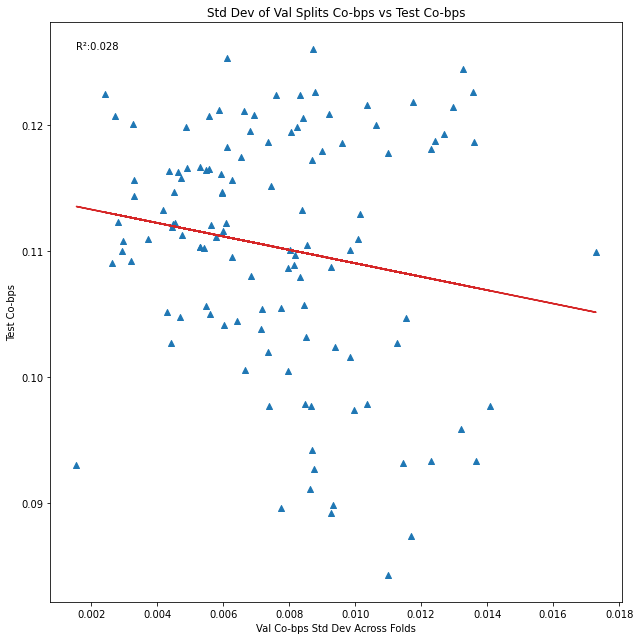

In [58]:
df = pandas.read_csv('/home/dmifsud/Projects/NDT-U/wandb_data_sep19.csv')
test = [
    df['val lt-co-bps0'], 
    df['val lt-co-bps1'], 
    df['val lt-co-bps2'], 
    df['val lt-co-bps3'], 
    df['val lt-co-bps4'], 
    df['val co-bps0'], 
    df['val co-bps1'], 
    df['val co-bps2'], 
    df['val co-bps3'], 
    df['val co-bps4'], 
    df['val loss0'], 
    df['val loss1'], 
    df['val loss2'], 
    df['val loss3'], 
    df['val loss4'], 
    df['val heldin loss0'], 
    df['val heldin loss1'], 
    df['val heldin loss2'], 
    df['val heldin loss3'], 
    df['val heldin loss4'], 
    df['val heldout loss0'], 
    df['val heldout loss1'], 
    df['val heldout loss2'], 
    df['val heldout loss3'], 
    df['val heldout loss4'], 
    df['test co-bps'], 
    df['le test trials co-bps'], 
    df['me test trials co-bps'], 
    df['he test trials co-bps'], 
    df['test decoding'],
    df['he test decoding'],
    df['le test decoding'],
    df['me test decoding'],
    df['model.context_backward'],
    df['model.context_forward'],
]
df_imp = pandas.concat(test, axis=1)
df_imp = df_imp[df_imp.notna().all(axis=1)]
# df_imp = df_imp[df_imp['model.context_backward'] != 3]
# df_imp = df_imp[df_imp['model.context_backward'] != 7]
# df_imp = df_imp[df_imp['model.context_backward'] != 5]
# df_imp = df_imp[df_imp['model.context_forward'] != 1]

smth_std = 60
lag = 40

fig, ax = plt.subplots(1, 1, figsize=(9, 9), sharex=True, sharey=True)

plt.xlabel("Val Co-bps Std Dev Across Folds")
plt.ylabel("Test Co-bps")
plt.title("Std Dev of Val Splits Co-bps vs Test Co-bps")

lst = [df_imp['val lt-co-bps0'], df_imp['val lt-co-bps1'], df_imp['val lt-co-bps2'], df_imp['val lt-co-bps3'], df_imp['val lt-co-bps4']]
# lst = [df_imp['val co-bps0'], df_imp['val co-bps1'], df_imp['val co-bps2'], df_imp['val co-bps3'], df_imp['val co-bps4']]

dfn = pandas.concat(lst, axis=1)
means_co_bps = dfn.mean(axis=1)
stds_co_bps = dfn.std(axis=1)

means_cobps2 = dfn.mean(axis=0)

lst2 = [
    df_imp['val lt-co-bps0'] - means_cobps2[0], 
    df_imp['val lt-co-bps1'] - means_cobps2[1], 
    df_imp['val lt-co-bps2'] - means_cobps2[2], 
    df_imp['val lt-co-bps3'] - means_cobps2[3], 
    df_imp['val lt-co-bps4'] - means_cobps2[4]
]

dfn2 = pandas.concat(lst2, axis=1)
means_co_bps22 = dfn2.mean(axis=1)
stds_co_bps2 = dfn2.std(axis=1)

lst = [df_imp['val loss0'], df_imp['val loss1'], df_imp['val loss2'], df_imp['val loss3'], df_imp['val loss4']]
# lst = [df_imp['val heldout loss0'], df_imp['val heldout loss1'], df_imp['val heldout loss2'], df_imp['val heldout loss3'], df_imp['val heldout loss4']]
# lst = [df_imp['val heldin loss0'], df_imp['val heldin loss1'], df_imp['val heldout loss2'], df_imp['val heldout loss3'], df_imp['val heldout loss4']]

dfn = pandas.concat(lst, axis=1)
means_loss = dfn.mean(axis=1)
stds_loss = dfn.std(axis=1)


comp_val = stds_co_bps2

comp_val2 = df_imp['test co-bps']

dfn = pandas.concat([comp_val, comp_val2], axis=1)
print(dfn.corr())
model = np.polyfit(comp_val, comp_val2, 1)
predict = np.poly1d(model)
plt.annotate("R²:{:.3f}".format(r2_score(comp_val2, predict(comp_val))), (np.min(comp_val), np.max(comp_val2)))


#add linear regression line to scatterplot 
plt.plot(comp_val, model[0]*comp_val+model[1], color='tab:red')

ax.scatter(comp_val, comp_val2, marker='^', c='tab:blue', label='Smooth')
# ax.scatter([i for i in range(len(comp_val))], comp_val2, marker='^', c='tab:blue', label='Smooth')
# ax.scatter(means, df_imp['test co-bps'], marker='^', c='tab:blue', label='Smooth')
# ax.scatter(means + stds, df_imp['test co-bps'], marker='^', c='tab:blue', label='Smooth')
# ax.scatter((0.5 * means) - (stds * 1.5), df_imp['test co-bps'], marker='^', c='tab:blue', label='Smooth')

# plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig('old_lag_vel_decoding_vs_co_bps.png', facecolor='white', transparent=False)